In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

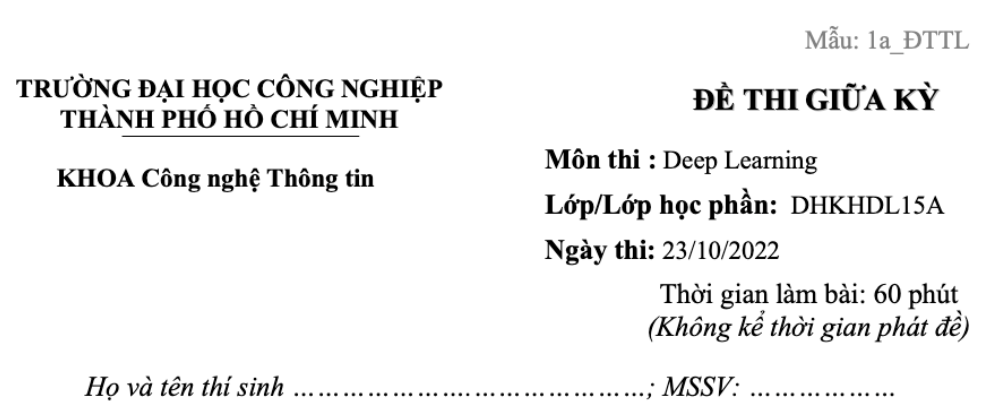

### Sinh viên được sử dụng tài liệu và Internet

## Họ và tên thí sinh: Nguyễn Quốc Tuấn
## MSSV: 18083891
## Git: https://github.com/tuannguyen7326/18083891_NguyenQuocTuan_Deep_Learning_Midterm.git

# Convolutional Neural Networks

Trong bài thi này các bạn sẽ sử dụng TF Keras Sequential API để xây dựng và train một mô hình Phân lớp Nhị phân (Binary Classification).

In [20]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

# %matplotlib inline
np.random.seed(1)

## Load the Data and Split the Data into Train/Test Sets

Bạn sẽ sử dụng tập dữ liệu Happy House với các hình ảnh người. Bạn sẽ dùng ConvNet để xác định người trong ảnh có đang cười không. Một người chỉ được vào Happy House nếu người đó đang cười. Bạn sẽ dùng hàm load_happy_dataset() để load dữ liệu và chia dữ liệu ra hai tập train và test. 

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

## Câu 1 (1 điểm) 
- Hiển thị số ảnh trong tập train
- Hiển thị số ảnh trong tập test
- Hiển thị kích thước của ảnh ($ W \times H \times n_c $) 

In [4]:
# YOUR CODE STARTS HERE
print(f'Số ảnh trong tập train: {X_train.shape[0]}, shape={X_train.shape}' )
print(f'Số ảnh trong tập test: {X_test.shape[0]}, shape={X_test.shape}' )
print(f'Kích thước của ảnh: shape={X_train[0].shape}')
# YOUR CODE ENDS HERE

Số ảnh trong tập train: 600, shape=(600, 64, 64, 3)
Số ảnh trong tập test: 150, shape=(150, 64, 64, 3)
Kích thước của ảnh: shape=(64, 64, 3)


## Câu 2 (1 điểm) 
- Hiển thị ảnh và label ở index 500 trong tập train
- Hiển thị ảnh và label ở index 501 trong tập train
- Hiển thị ảnh và label ở index 100 trong tập test
- Hiển thị ảnh và label ở index 101 trong tập test
- Tính tỉ lệ ảnh có người cười trong tâp train và tập test. So sánh 2 tỉ lệ này.

Label ở index 500 ở tập train là: [1]


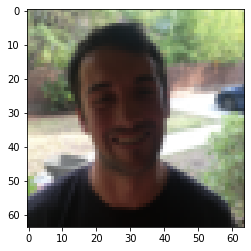




Label ở index 501 ở tập train là: [0]


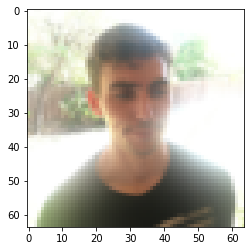




Label ở index 100 ở tập test là: [1]


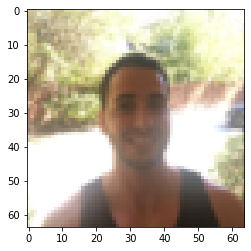




Label ở index 101 ở tập test là: [0]


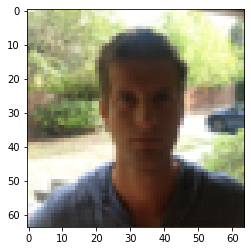

In [8]:
# padding là  2,2

# YOUR CODE STARTS HERE
import time
def displayImageAndLabel(images:np.ndarray, labels:np.ndarray, index:int, type:str):
    print(f'Label ở index {index} ở tập {type} là: {labels[index]}')
    plt.figure()
    plt.imshow(images[index])
    plt.show()
    print('\n\n')
    time.sleep(0.1)


displayImageAndLabel(X_train, Y_train, 500, 'train')
displayImageAndLabel(X_train, Y_train, 501, 'train')
displayImageAndLabel(X_test, Y_test, 100, 'test')
displayImageAndLabel(X_test, Y_test, 101, 'test')



# YOUR CODE ENDS HERE

## Câu 3 (3 điểm)


Viết hàm smilingModel() để xây dựng mô hình CNN với các lớp như sau 

`ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE`. Tham khảo [tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers) 

Tham số của các lớp như sau

 - [ZeroPadding2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ZeroPadding2D): padding 3, input shape 64 x 64 x 3
 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): 16 5x5 filters, stride 1
 - [BatchNormalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization): axis 3
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Dùng default parameters
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) đầu ra của lớp trước.
 - Fully-connected ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Dùng một lớp FC với một neuron và một sigmoid activation. 
 
 
 **Hint:**
 
 Use **tfl** as shorthand for **tensorflow.keras.layers**

In [9]:
def smilingModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
        
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 2, input shape of 64 x 64 x 3
            
            ## Conv2D with 16 5x5 filters and stride of 1
            
            ## BatchNormalization for axis 3
            
            ## ReLU
            
            ## Max Pooling 2D with default parameters
            
            ## Flatten layer
            
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            
            # YOUR CODE STARTS HERE

            ## Input layer
            tf.keras.layers.Input((64,64,3)), 


            ## ZeroPadding2D with padding 2, input shape of 64 x 64 x 3
            tf.keras.layers.ZeroPadding2D(padding=(3, 3)),


            ## Conv2D with 16 5x5 filters and stride of 1
            tf.keras.layers.Conv2D(
                16,
                (5, 5), # 5x5 filters
                strides = (1, 1) # stride of 1
            ),



            ## BatchNormalization for axis 3
            tf.keras.layers.BatchNormalization(axis=3),



            ## ReLU
            tf.keras.layers.ReLU(),



            ## Max Pooling 2D with default parameters
            tf.keras.layers.MaxPooling2D((2, 2)),



            ## Flatten layer
            tf.keras.layers.Flatten(),



            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tf.keras.layers.Dense(1, activation='sigmoid'),


            # YOUR CODE ENDS HERE
        ])
    
    return model

In [10]:
smiling_model = smilingModel()
# Print a summary for each layer
for layer in summary(smiling_model):
    print(layer)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 66, 66, 16), 1216, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 66, 66, 16), 64]
['ReLU', (None, 66, 66, 16), 0]
['MaxPooling2D', (None, 33, 33, 16), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 17424), 0]
['Dense', (None, 1), 17425, 'sigmoid']


In [11]:
smiling_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

## Câu 4 (1 điểm)
- Hiển thị các tham số của tất cả các layer mô hình

In [12]:
# YOUR CODE STARTS HERE
smiling_model.summary()




# YOUR CODE ENDS HERE

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 66, 66, 16)        1216      
                                                                 
 batch_normalization (BatchN  (None, 66, 66, 16)       64        
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 66, 66, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 33, 16)       0         
 )                                                               
                                                        

## Câu 5 (2 điểm)
- Giải thích các tham số của từng layer (sử dụng tham số của lớp trước nếu cần) trong kiến trúc ở trên

In [ ]:
# YOUR ANSWERS
def explainModel():
    model = tf.keras.Sequential([
            # YOUR CODE STARTS HERE

            ## Input layer
            tf.keras.layers.Input(
                (64,64,3) # Đầu vào là ảnh có kích thước (64,64,3)
            ), 

            # Bên dưới là các hiden layer

            ## ZeroPadding2D with padding 2, input shape of 64 x 64 x 3
            tf.keras.layers.ZeroPadding2D(
                padding=(3, 3)
            ),
                # padding cho ảnh
                # output_shape = (70, 70, 3)
                #     chiều rộng 64 + 3 * 2 = 70,
                #     chiều cao 64 + 3 * 2 = 70,
                #     độ sâu: 3


            ## Conv2D with 16 5x5 filters and stride of 1
            tf.keras.layers.Conv2D(
                16, # filters
                (5, 5), # kernel_size = 5x5
                strides = (1, 1) # stride of 1
            ),
            # Lớp tích chập 2D
                # công thức: [(W−K+2P)/S]+1
                # W là kích thước đầu vào - trường hợp ở đây là 66
                # K là kích thước Kernel - (5, 5)
                # P là padding - mặc định là 0
                # S là stride - Ở đây ta có: (1, 1)
            # dễ dàng tính được: (70-5+0)/1+1 = 66
            # suy ra output_shape = (66, 66, 16)





            ## BatchNormalization for axis 3
            tf.keras.layers.BatchNormalization(axis=3),
            # Lớp chuẩn hóa đầu vào với số chiều là 3
            # output_shape không đổi: (66, 66, 16)


            ## ReLU - activation
            tf.keras.layers.ReLU(),
            # output_shape không đổi: (66, 66, 16)


            ## Max Pooling 2D with default parameters
            tf.keras.layers.MaxPooling2D(
                (2, 2) # pool_size
            ),
            # Lớp tổng hợp cực đạt với pool_size = (2, 2)
            # output_shape = (33, 33, 16)



            ## Flatten layer
            tf.keras.layers.Flatten(),
            # Làm phẳng đầu vào để đưa vào lớp kế tiếp
            # output_shape = 33*33*16 = 17424



            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tf.keras.layers.Dense(1, activation='sigmoid'),
            # Mạng nơron với 1 nơron. Vì đây là bài toán phân lớp nhị phân

            # YOUR CODE ENDS HERE
        ])
    
    return model

## Câu 6 (1 điểm)
Train mô hình sử dụng X_train, Y_train, số epochs = 20, batch_size = 16

In [14]:
# YOUR CODE STARTS HERE
history = smiling_model.fit(X_train, Y_train, epochs=20, batch_size=16)

# YOUR CODE ENDS HERE

Epoch 1/20
38/38 [==============================] - 1s 28ms/step - loss: 0.0287 - accuracy: 0.9917
Epoch 2/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0250 - accuracy: 0.9917
Epoch 3/20
38/38 [==============================] - 1s 36ms/step - loss: 0.0305 - accuracy: 0.9917
Epoch 4/20
38/38 [==============================] - 1s 26ms/step - loss: 0.0699 - accuracy: 0.9750
Epoch 5/20
38/38 [==============================] - 2s 41ms/step - loss: 0.0393 - accuracy: 0.9850
Epoch 6/20
38/38 [==============================] - 1s 26ms/step - loss: 0.0129 - accuracy: 1.0000
Epoch 7/20
38/38 [==============================] - 1s 35ms/step - loss: 0.0252 - accuracy: 0.9933
Epoch 8/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0369 - accuracy: 0.9867
Epoch 9/20
38/38 [==============================] - 1s 27ms/step - loss: 0.0290 - accuracy: 0.9917
Epoch 10/20
38/38 [==============================] - 2s 42ms/step - loss: 0.0340 - accuracy: 0.9900
Epoch 11/

## Câu 7 (1 điểm)
Với quá trình train mô hình trong Câu 6:
- Viết công thức của hàm Loss theo $\hat{y}$ và $y$ (dùng Latex)
- Vẽ đồ thị của hàm Loss theo epoch
- Viết công thức của accuracy (dùng Latex)
- Vẽ đồ thị của accuracy theo epoch

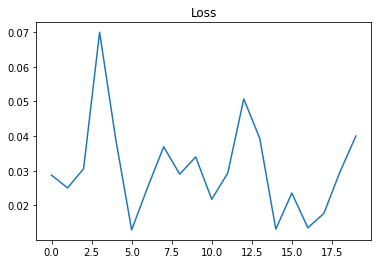

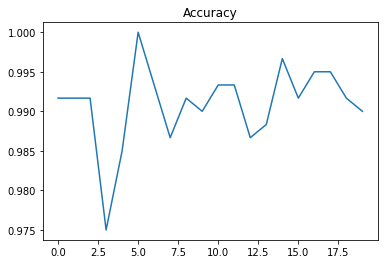

In [23]:
# YOUR ANSWERS
def drawHistory():
    plt.figure()
    plt.title('Loss')
    plt.plot(history.history['loss'])
    plt.show()

    plt.figure()
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'])
    plt.show()

drawHistory()

#  ------------------------ Hết ------------------------